# H0 : weather,temp,season,humidity,and windspeed do NOT have an effect on num of bike rentals

# Ha : they do

In [108]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import datetime as dt

plt.style.use('seaborn')
sns.set(style="white")

In [19]:
df = pd.read_pickle('bike_dataset')

In [46]:
# df.head()

In [21]:
def columnize(df, column, new_vals, new_col):
    list1 = df[column].unique()
    dict1 = dict(zip(list1,new_vals))
    df[new_col] = df[column].map(dict1)
    df = pd.concat([df, pd.get_dummies(df[new_col])], 1)
    return df

In [22]:
#df = columnize(df, 'weathersit', ['clear', 'misty', 'light_storm', 'heavy_storm'],'weather')

In [23]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'] = df['dteday'].map(dt.datetime.toordinal)

In [24]:
df = df[df.cnt>100]

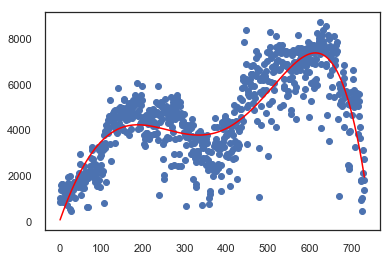

(-17.17599972472817, array([[ 0.00000000e+00,  5.22414447e+01, -1.76805947e-01,
         -3.72186381e-05,  8.86200088e-07, -8.63714433e-10]]))

In [107]:
x=df.instant.values.reshape(-1,1)
y=df.cnt.values.reshape(-1,1)

# Regression
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

predictions = model.predict(x_poly)

# Plotting
plt.scatter(df['instant'], df['cnt'])
plt.plot(df['instant'],predictions,c='red')
plt.show()

model.intercept_[0], model.coef_


In [121]:
x_poly.shape

(730, 6)

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  5.,  5.,  8., 13., 21.,
        24., 26., 47., 54., 51., 65., 51., 46., 53., 49., 35., 27., 26.,
        27., 17., 18., 15.,  4., 10.,  5.,  1.,  5.,  7.,  3.,  2.,  2.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-3696.11914787, -3515.55982839, -3335.00050891, -3154.44118943,
        -2973.88186995, -2793.32255047, -2612.76323099, -2432.20391151,
        -2251.64459203, -2071.08527254, -1890.52595306, -1709.96663358,
        -1529.4073141 , -1348.84799462, -1168.28867514,  -987.72935566,
         -807.17003618,  -626.6107167 ,  -446.05139722,  -265.49207774,
          -84.93275825,    95.62656123,   276.18588071,   456.74520019,
          637.30451967,   817.86383915,   998.42315863,  1178.98247811,
         1359.54179759,  1540.10111707,  1720.66043655,  1901.21975603,
         2081.77907552,  2262.338395  ,  2442.89771448,  2623.45703396,
         2804.01635344,  2984.57567292,  3165.1349924 ,  3345.694311

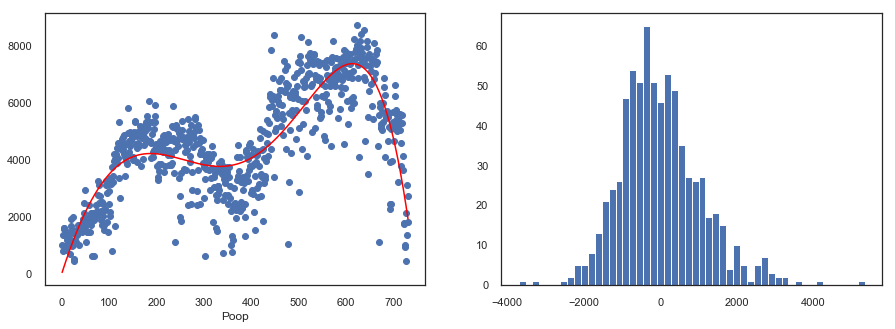

In [133]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].scatter(df['instant'], df['cnt'])
ax[0].plot(df['instant'],predictions,c='red')
ax[0].set_xlabel('Poop')
ax[1].hist(df['resids'], bins=50)

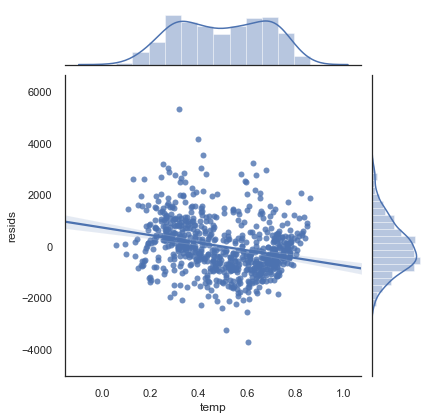

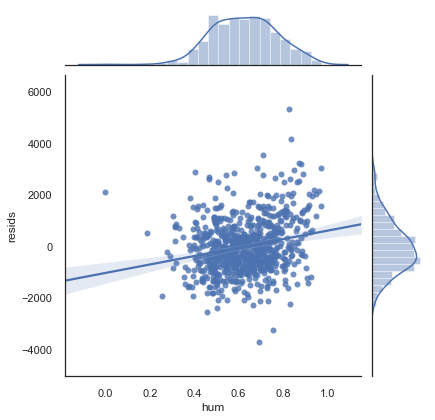

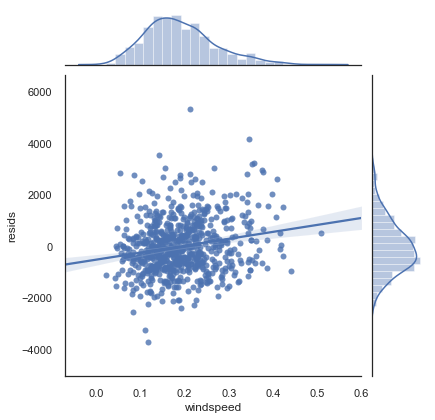

In [135]:
sns.jointplot(x="temp", y="resids", data=df, kind="reg"),
sns.jointplot(x="hum", y="resids", data=df, kind="reg"),
sns.jointplot(x="windspeed", y="resids", data=df, kind="reg")

In [96]:
def resid(x,y_actual):
    return (model.intercept_[0]+sum([model.coef_[0][i]*x**i for i in range(len(model.coef_[0]))])) -  y_actual

In [97]:
df['resids'] = resid(df['instant'], df['cnt'])
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,weather,clear,light_storm,misty,fall,spring,summer,winter,resids
0,1,719163,winter,0,1,0,6,0,2,0.344167,...,985,clear,1,0,0,0,0,0,1,-950.111397
1,2,719163,winter,0,1,0,0,0,2,0.363478,...,801,clear,1,0,0,0,0,0,1,-714.400618
2,3,719163,winter,0,1,0,1,1,1,0.196364,...,1349,misty,0,0,1,0,0,0,1,-1211.043852
3,4,719163,winter,0,1,0,2,1,1,0.200000,...,1562,misty,0,0,1,0,0,0,1,-1373.041272
4,5,719163,winter,0,1,0,3,1,1,0.226957,...,1600,misty,0,0,1,0,0,0,1,-1360.393026
5,6,719163,winter,0,1,0,4,1,1,0.204348,...,1606,misty,0,0,1,0,0,0,1,-1316.099243
6,7,719163,winter,0,1,0,5,1,2,0.196522,...,1510,clear,1,0,0,0,0,0,1,-1170.160031
7,8,719163,winter,0,1,0,6,0,2,0.165000,...,959,clear,1,0,0,0,0,0,1,-569.575477
8,9,719163,winter,0,1,0,0,0,1,0.138333,...,822,misty,0,0,1,0,0,0,1,-383.345648
9,10,719163,winter,0,1,0,1,1,1,0.150833,...,1321,misty,0,0,1,0,0,0,1,-833.470590


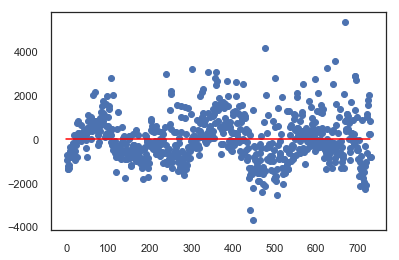

In [98]:
plt.scatter(df['instant'], df['resids'])
x = np.linspace(0,730,730)
y = np.array([0 for i in range(len(x))])
plt.plot(x,y, c='red')

In [99]:
lr_model = ols(formula='resids~temp*hum*windspeed*(summer+winter+spring)*(clear+misty+light_storm)', data=df).fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 resids   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     8.177
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           2.27e-58
Time:                        15:57:22   Log-Likelihood:                -5866.3
No. Observations:                 730   AIC:                         1.190e+04
Df Residuals:                     648   BIC:                         1.227e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -5.361e+04   6.79e+04     -0.789      0.430   -1.87e+05    7.98e+04
temp                                   1.041e+05    1.2e+05      0.869      0.385   -1.31e+05    3.39e+05
hum                                    5.932e+04   7.76e+04      0.765      0.445    -9.3e+04    2.12e+05
temp:hum                              -1.157e+05   1.37e+05     -0.847      0.397   -3.84e+05    1.52e+05
windspeed                              2.509e+05   5.71e+05      0.439      0.661   -8.71e+05    1.37e+06
temp:windspeed                        -5.135e+05   9.52e+05     -0.539      0.590   -2.38e+06    1.36e+06
hum:windspeed                         -2.774e+05   6.52e+05     -0.426      0.671   -1.56e+06       1e+06
temp:hum:windspeed                     5.792e+05   1.09e+06      0.533      0.594   -1.56e+06    2.71e+06
summer                                 9919.4473   3.12e+04      0.318      0.751   -5.13e+04    7.12e+04
winter                                 3263.3158   7.04e+04      0.046      0.963   -1.35e+05    1.42e+05
spring                                 1.395e+04    2.8e+04      0.499      0.618    -4.1e+04    6.89e+04
temp:summer                           -1.963e+04   4.45e+04     -0.441      0.659   -1.07e+05    6.77e+04
temp:winter                           -2.052e+04   3.43e+04     -0.599      0.549   -8.78e+04    4.68e+04
temp:spring                            -3.41e+04   1.36e+04     -2.507      0.012   -6.08e+04   -7390.181
hum:summer                            -6594.4415   4.53e+04     -0.145      0.884   -9.56e+04    8.24e+04
hum:winter                             2163.7054   7.41e+04      0.029      0.977   -1.43e+05    1.48e+05
hum:spring                            -2.067e+04   3.22e+04     -0.641      0.521   -8.39e+04    4.26e+04
temp:hum:summer                        1.813e+04   6.48e+04      0.280      0.780   -1.09e+05    1.45e+05
temp:hum:winter                        -457.9633   2.34e+04     -0.020      0.984   -4.64e+04    4.55e+04
temp:hum:spring                        4.815e+04   2.91e+04      1.654      0.099   -9007.213    1.05e+05
windspeed:summer                      -1.559e+05   1.71e+05     -0.910      0.363   -4.92e+05     1.8e+05
windspeed:winter                      -3.105e+04      3e+04     -1.036      0.301   -8.99e+04    2.78e+04
windspeed:spring                       -6.62e+04   3.72e+04     -1.778      0.076   -1.39e+05    6926.300
temp:windspeed:summer                  2.695e+05   2.47e+05      1.089      0.276   -2.16e+05    7.55e+05
temp:windspeed:winter                  5.255e+04   7.89e+04      0.666      0.506   -1.02e+05    2.07e+05
temp:windspeed:spring                  1.626e+05   6.14e+04      2.650      0.008    4.21e+04    2.83e+05
hum:winds

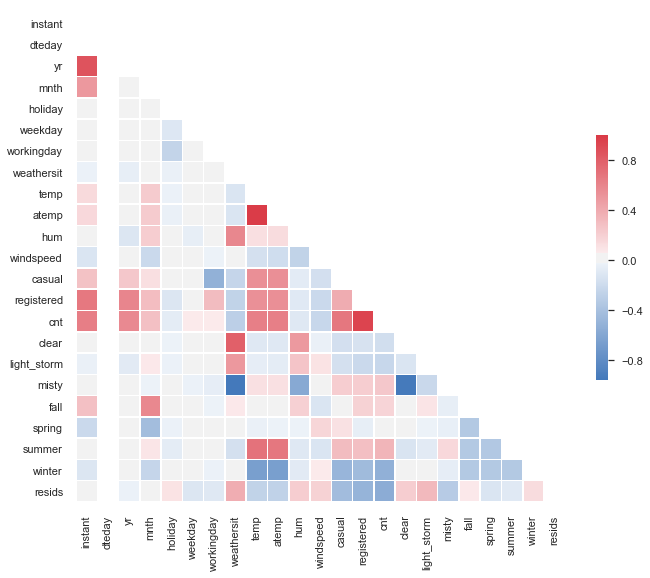

In [31]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df.corr(), dropDuplicates = True)

In [104]:
df.describe()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,registered,cnt,clear,light_storm,misty,fall,spring,summer,winter,resids
count,730.000000,730.0,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,7.300000e+02
mean,365.586301,719163.0,0.500000,6.515068,0.028767,3.000000,0.683562,1.393151,0.495461,0.474402,...,3661.153425,4510.489041,0.338356,0.027397,0.634247,0.247945,0.252055,0.252055,0.247945,-5.447001e-12
std,211.013951,0.0,0.500343,3.451871,0.167266,2.004795,0.465405,0.542015,0.183165,0.163068,...,1555.499166,1931.408300,0.473475,0.163350,0.481971,0.432116,0.434490,0.434490,0.432116,1.064120e+03
min,1.000000,719163.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,416.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.696119e+03
25%,183.250000,719163.0,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,...,2502.250000,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.945124e+02
50%,365.500000,719163.0,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499166,0.487364,...,3664.500000,4548.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.151855e+02
75%,547.750000,719163.0,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,...,4783.250000,5966.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,5.726303e+02
max,731.000000,719163.0,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6946.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.331847e+03


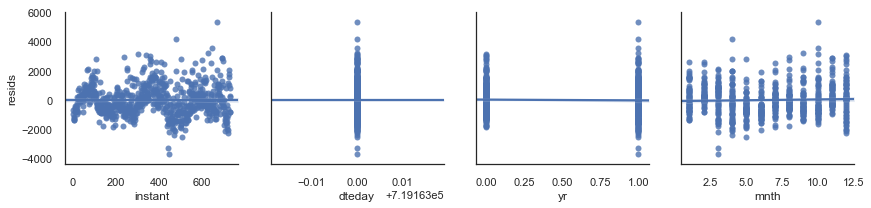

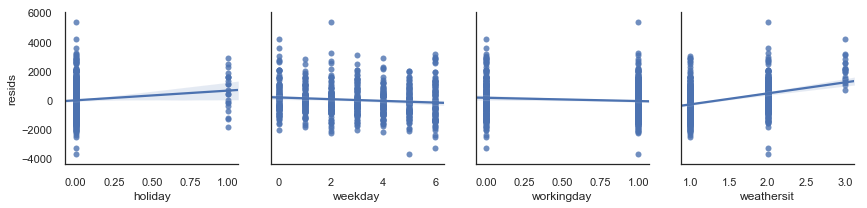

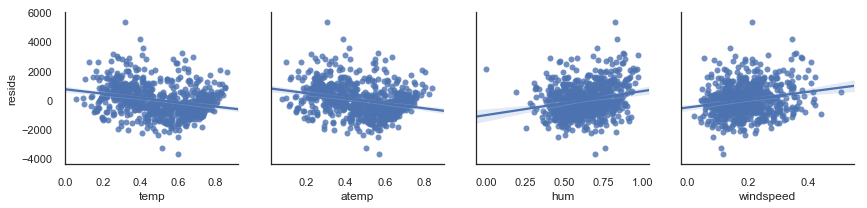

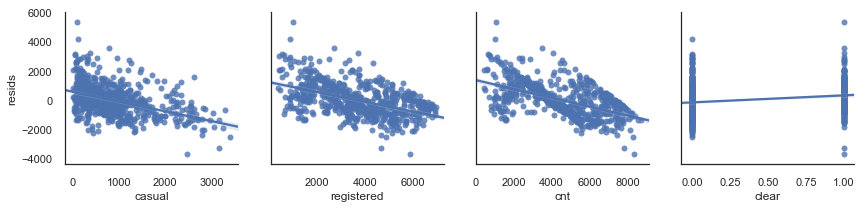

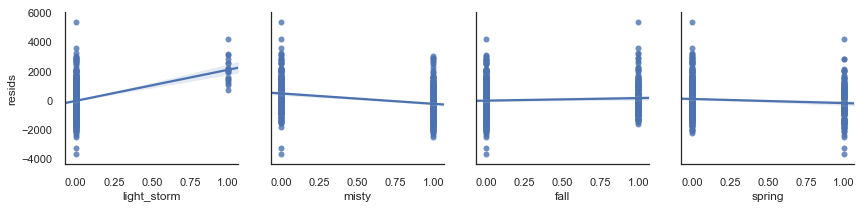

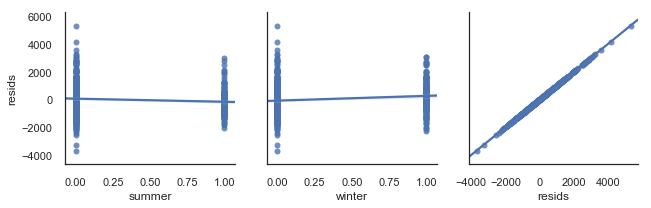

In [103]:
feats = list(df.select_dtypes(include=['int64','float64','uint8']).columns)
n = 4
row_groups= [feats[i:i+n] for i in range(0, len(feats), n)]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['resids'], x_vars=i, kind="reg", height=3)